In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import date
np.set_printoptions(precision=3, suppress=True)
pd.options.mode.use_inf_as_na = True

## Bài 1




In [46]:
#Lấy data từ file csv
data_set=pd.read_csv('./data/nycflights.csv')
data_set.info()
data_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      336776 non-null  int64  
 1   year       336776 non-null  int64  
 2   month      336776 non-null  int64  
 3   day        336776 non-null  int64  
 4   dep_time   328521 non-null  float64
 5   dep_delay  328521 non-null  float64
 6   arr_time   328063 non-null  float64
 7   arr_delay  327346 non-null  float64
 8   carrier    336776 non-null  object 
 9   tailnum    334264 non-null  object 
 10  flight     336776 non-null  int64  
 11  origin     336776 non-null  object 
 12  dest       336776 non-null  object 
 13  air_time   327346 non-null  float64
 14  distance   336776 non-null  int64  
 15  hour       328521 non-null  float64
 16  minute     328521 non-null  float64
dtypes: float64(7), int64(6), object(4)
memory usage: 43.7+ MB


,index,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


In [47]:
#Lấy data từ 2 cột origin và dep_delay
data=data_set[['origin','dep_delay']].dropna(axis = 0, how = "any").reset_index(drop=True)
data

,origin,dep_delay
0,EWR,2.0
1,LGA,4.0
2,JFK,2.0
3,JFK,-1.0
4,LGA,-6.0
...,...,...
328516,JFK,-5.0
328517,JFK,-10.0
328518,JFK,-5.0
328519,JFK,12.0


In [48]:
#Các chuyến bay trễ 
late=data[data['dep_delay']>0].groupby(['origin']).sum()
display('Delay flights',late)


'Delay flights'

,dep_delay
origin,
EWR,2055092.0
JFK,1599144.0
LGA,1402547.0


In [49]:
#Các chuyến bay sớm
soon=data[data['dep_delay']<=0].groupby(['origin']).sum()
display('Early flights',abs(soon))

'Early flights'

,dep_delay
origin,
EWR,278457.0
JFK,273880.0
LGA,352246.0


In [50]:
#Bảng hiển thị các chuyến bay trễ và không trễ
table_brand = pd.concat((late,abs(soon)),axis=1)
table_brand.columns=('Delay flights','Early flights')
table_brand

,Delay flights,Early flights
origin,,
EWR,2055092.0,278457.0
JFK,1599144.0,273880.0
LGA,1402547.0,352246.0


In [92]:
table_brand.plot.pie
plt.show()

# Bài 2

In [52]:
data=data_set[['carrier','dep_delay']].dropna(axis = 0, how = "any").reset_index(drop=True)
data

,carrier,dep_delay
0,UA,2.0
1,UA,4.0
2,AA,2.0
3,B6,-1.0
4,DL,-6.0
...,...,...
328516,B6,-5.0
328517,B6,-10.0
328518,B6,-5.0
328519,B6,12.0


In [53]:
late=data[data['dep_delay']>0].groupby(['carrier']).sum()
display('Delay flights',late)

'Delay flights'

,dep_delay
carrier,
9E,345522.0
AA,377714.0
AS,7083.0
B6,853387.0
DL,570017.0
EV,1164581.0
F9,15392.0
FL,67526.0
HA,3094.0


In [54]:
soon=data[data['dep_delay']<=0].groupby(['carrier']).sum()
display('Early flights',abs(soon))

'Early flights'

,dep_delay
carrier,
9E,54226.0
AA,102163.0
AS,2950.0
B6,147970.0
DL,127535.0
EV,139752.0
F9,1605.0
FL,7846.0
HA,1418.0


In [55]:
table_carrier = pd.concat((late,abs(soon)),axis=1)
table_carrier.columns=('Delay flights','Early flights')
table_carrier

,Delay flights,Early flights
carrier,,
9E,345522.0,54226.0
AA,377714.0,102163.0
AS,7083.0,2950.0
B6,853387.0,147970.0
DL,570017.0,127535.0
EV,1164581.0,139752.0
F9,15392.0,1605.0
FL,67526.0,7846.0
HA,3094.0,1418.0


# Bài 3

In [59]:
average_late=data_set[['carrier','dep_delay','distance']].groupby(['carrier']).mean()
average_late

,dep_delay,distance
carrier,,
9E,16.725769,530.235753
AA,8.586016,1340.235999
AS,5.804775,2402.000000
B6,13.022522,1068.621525
DL,9.264505,1236.901206
EV,19.955390,562.991730
F9,20.215543,1620.000000
FL,18.726075,664.829448
HA,4.900585,4983.000000


In [60]:
average_late2=data_set[['origin','dep_delay','distance']].groupby(['origin']).mean()
average_late2

,dep_delay,distance
origin,,
EWR,15.107954,1056.742790
JFK,12.112159,1266.249077
LGA,10.346876,779.835671


### Biểu đồ thể hiện thời gian trễ của các hãng

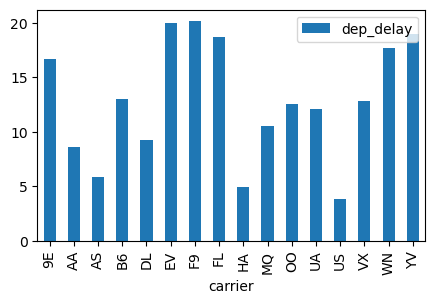

In [63]:
ax3=average_late.plot.bar(y='dep_delay', figsize=(5,3))
plt.show()

### Biểu đồ thể hiện thời gian trễ của các sân bay

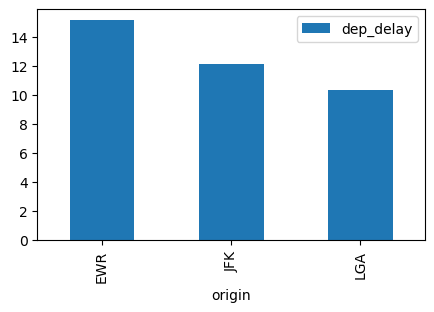

In [93]:
ax4=average_late2.plot.bar(y='dep_delay', figsize=(5,3))


# Bài 4

In [80]:
total_mean=data_set[['carrier','distance']].groupby(['carrier']).mean()
total_mean

,distance
carrier,
9E,530.235753
AA,1340.235999
AS,2402.000000
B6,1068.621525
DL,1236.901206
EV,562.991730
F9,1620.000000
FL,664.829448
HA,4983.000000


In [83]:
total_median=data_set[['carrier','distance']].groupby(['carrier']).median()

total_median

,distance
carrier,
9E,509.0
AA,1096.0
AS,2402.0
B6,1023.0
DL,1020.0
EV,533.0
F9,1620.0
FL,762.0
HA,4983.0


In [84]:
total_sum=data_set[['carrier','distance']].groupby(['carrier']).sum()
total_sum

,distance
carrier,
9E,9788152
AA,43864584
AS,1715028
B6,58384137
DL,59507317
EV,30498951
F9,1109700
FL,2167344
HA,1704186


In [88]:
total=pd.concat((total_mean,total_median,total_sum), axis=1)
total.columns=('Mean','Meddian','Sum')
total


,Mean,Meddian,Sum
carrier,,,
9E,530.235753,509.0,9788152
AA,1340.235999,1096.0,43864584
AS,2402.000000,2402.0,1715028
B6,1068.621525,1023.0,58384137
DL,1236.901206,1020.0,59507317
EV,562.991730,533.0,30498951
F9,1620.000000,1620.0,1109700
FL,664.829448,762.0,2167344
HA,4983.000000,4983.0,1704186
